# Western PM~2.5~

My first attempt to learn Python. I am going to import the PM time-series data frame I've created for the wildfire project. First step is to install numpy and pandas.

In [18]:
# Load libraries
import pandas as pd
import numpy as np
from scipy import stats, integrate

Attempting to read in PM csv data using pandas read_csv function.

In [13]:
# Load PM data from my meta_wildfire repo; read fips as character to preserve leading 0
pm_df = pd.read_csv('.././meta_wildfire/data/smoke/1015-county_popwt_pm.csv', dtype = {'fips':object})

In [14]:
# View first 5 rows
pm_df.head()

,state,fips,date,day,month,year,pm_krig,bg_pm,pm_smk,hms,...,aqi_cat,aqi_param,aqi_site,aqi_site_n,smoke0,smoke5,smoke10,smoke15,high_pm_day,smoke_wave
0,Arizona,04001,2010-01-01,Friday,1,2010,2.850254,3.004304,0.000000,0.0,...,Good,PM10,04-001-1003,1.0,0,0,0,0,0,0
1,Arizona,04001,2010-01-02,Saturday,1,2010,3.907675,3.004304,0.903371,0.0,...,Good,PM10,04-001-1003,2.0,0,0,0,0,0,0
2,Arizona,04001,2010-01-03,Sunday,1,2010,4.726531,3.004304,1.722227,0.0,...,Good,PM10,04-001-1003,1.0,0,0,0,0,0,0
3,Arizona,04001,2010-01-04,Monday,1,2010,3.428257,3.004304,0.423954,0.0,...,Good,PM10,04-001-1003,1.0,0,0,0,0,0,0
4,Arizona,04001,2010-01-05,Tuesday,1,2010,3.943863,3.004304,0.939560,0.0,...,Good,PM10,04-001-1003,2.0,0,0,0,0,0,0


Subsetting to Colorado and printing first 5 rows.

In [16]:
# limit to colorado
co_pm = pm_df[pm_df['state'] == "Colorado"]
# print first 5 rows
co_pm.head()

,state,fips,date,day,month,year,pm_krig,bg_pm,pm_smk,hms,...,aqi_cat,aqi_param,aqi_site,aqi_site_n,smoke0,smoke5,smoke10,smoke15,high_pm_day,smoke_wave
159943,Colorado,08001,2010-01-01,Friday,1,2010,12.756563,9.252436,3.504127,0.0,...,Good,NO2,08-001-3001,2.0,0,0,0,0,0,0
159944,Colorado,08001,2010-01-02,Saturday,1,2010,19.007927,9.252436,9.755491,0.0,...,Moderate,PM2.5,08-001-0006,2.0,0,0,0,0,0,0
159945,Colorado,08001,2010-01-03,Sunday,1,2010,6.546211,9.252436,0.000000,0.0,...,Good,NO2,08-001-3001,2.0,0,0,0,0,0,0
159946,Colorado,08001,2010-01-04,Monday,1,2010,7.496881,9.252436,0.000000,0.0,...,Good,NO2,08-001-3001,2.0,0,0,0,0,0,0
159947,Colorado,08001,2010-01-05,Tuesday,1,2010,12.726194,9.252436,3.473758,0.0,...,Moderate,PM2.5,08-001-0006,2.0,0,0,0,0,0,0


Loading seaborn and matplotlib packages.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

Plot density of PM~2.5~ values.

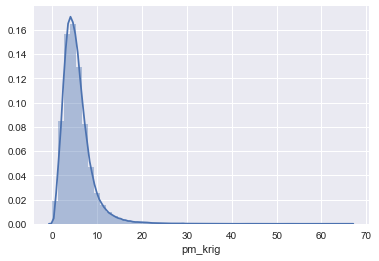

In [20]:
sns.distplot(co_pm['pm_krig'])